In [33]:
# Імпорт бібліотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import time
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
from PIL import Image
from io import BytesIO
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression

In [32]:
# Налаштування відображення
plt.style.use('seaborn-v0_8')
seaborn.set(font_scale=1.1)
plt.rcParams['figure.figsize'] = (12, 8)

In [5]:
#завантаження даних
data = pd.read_csv("C:/Users/User/Downloads/BMW sales data (2010-2024) (1).csv")

print("Dataset info")
print(f"Розмір датасету: {data.shape}")
print("\nПерші 5 рядків:")
print(data.head())

Dataset info
Розмір датасету: (50000, 11)

Перші 5 рядків:
      Model  Year         Region  Color Fuel_Type Transmission  Engine_Size_L  \
0  5 Series  2016           Asia    Red    Petrol       Manual            3.5   
1        i8  2013  North America    Red    Hybrid    Automatic            1.6   
2  5 Series  2022  North America   Blue    Petrol    Automatic            4.5   
3        X3  2024    Middle East   Blue    Petrol    Automatic            1.7   
4  7 Series  2020  South America  Black    Diesel       Manual            2.1   

   Mileage_KM  Price_USD  Sales_Volume Sales_Classification  
0      151748      98740          8300                 High  
1      121671      79219          3428                  Low  
2       10991     113265          6994                  Low  
3       27255      60971          4047                  Low  
4      122131      49898          3080                  Low  


In [6]:
#LabelEncoder
label_encoder = LabelEncoder()
data['Model'] = label_encoder.fit_transform(data['Model'])
data['Region'] = label_encoder.fit_transform(data['Region'])
data['Color'] = label_encoder.fit_transform(data['Color'])
data['Fuel_Type'] = label_encoder.fit_transform(data['Fuel_Type'])
data['Transmission'] = label_encoder.fit_transform(data['Transmission'])

In [7]:
#визначаємо дані
data['Sales_Classification'] = data['Sales_Classification'].map({'High': 1, 'Low': 0})
data_small = data.sample(5000, random_state=42)

X = data_small.drop('Sales_Classification', axis=1)
y = data_small['Sales_Classification']

In [10]:
#стандартизація даних
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#поділ на тренувальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [9]:
#навчання моделі на оригінальних даних (RandomForest)
start_time = time.time()
rf_original = RandomForestClassifier(random_state=42)
rf_original.fit(X_train, y_train)
train_time_original = time.time() - start_time

y_pred_original = rf_original.predict(X_test)
acc_original = accuracy_score(y_test, y_pred_original)
print(f"Точність: {acc_original:.4f}")
print(f"Час навчання: {train_time_original:.4f} сек")
print(classification_report(y_test, y_pred_original, target_names=['Low Sales', 'High Sales']))

Точність: 1.0000
Час навчання: 0.4910 сек
              precision    recall  f1-score   support

   Low Sales       1.00      1.00      1.00       692
  High Sales       1.00      1.00      1.00       308

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



In [18]:
#pca
pca = PCA(n_components=6)
X_pca = pca.fit_transform(X_scaled)

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [19]:
#навчання після PCA
start_time = time.time()
rf_pca = RandomForestClassifier(random_state=42)
rf_pca.fit(X_train_pca, y_train_pca)
train_time_pca = time.time() - start_time

y_pred_pca = rf_pca.predict(X_test_pca)
acc_pca = accuracy_score(y_test_pca, y_pred_pca)
print(f"Точність: {acc_pca:.4f}")
print(f"Час навчання: {train_time_pca:.4f} сек")
print(classification_report(y_test_pca, y_pred_pca, target_names=['Low Sales', 'High Sales']))

Точність: 0.8140
Час навчання: 1.0235 сек
              precision    recall  f1-score   support

   Low Sales       0.83      0.91      0.87       692
  High Sales       0.75      0.59      0.66       308

    accuracy                           0.81      1000
   macro avg       0.79      0.75      0.77      1000
weighted avg       0.81      0.81      0.81      1000



In [13]:
#порівняння результатів
print(f"Точність оригінал: {acc_original:.4f}, після PCA: {acc_pca:.4f}")
print(f"Час навчання оригінал: {train_time_original:.4f} сек, після PCA: {train_time_pca:.4f} сек")

Точність оригінал: 1.0000, після PCA: 0.7860
Час навчання оригінал: 0.4910 сек, після PCA: 1.0016 сек


In [20]:
'''На оригінальних даних Random Forest досяг точності 100 % через сильне перенавчання - модель просто запам’ятала тренувальні приклади.
Після застосування PCA з фіксованою кількістю компонент точність впала до 78.6 %, але це реальна узагальнююча здатність моделі, а не ілюзія.
PCA усунула шум і корельовані ознаки, які дозволяли дереву ідеально підлаштовуватись під тренувальні дані.
Час навчання зріс через додаткові обчислення PCA, але при більшій кількості ознак ефект був би протилежним - суттєве прискорення.'''

'На оригінальних даних Random Forest досяг точності 100 % через сильне перенавчання - модель просто запам’ятала тренувальні приклади.\nПісля застосування PCA з фіксованою кількістю компонент точність впала до 78.6 %, але це реальна узагальнююча здатність моделі, а не ілюзія.\nPCA усунула шум і корельовані ознаки, які дозволяли дереву ідеально підлаштовуватись під тренувальні дані.\nЧас навчання зріс через додаткові обчислення PCA, але при більшій кількості ознак ефект був би протилежним - суттєве прискорення.'

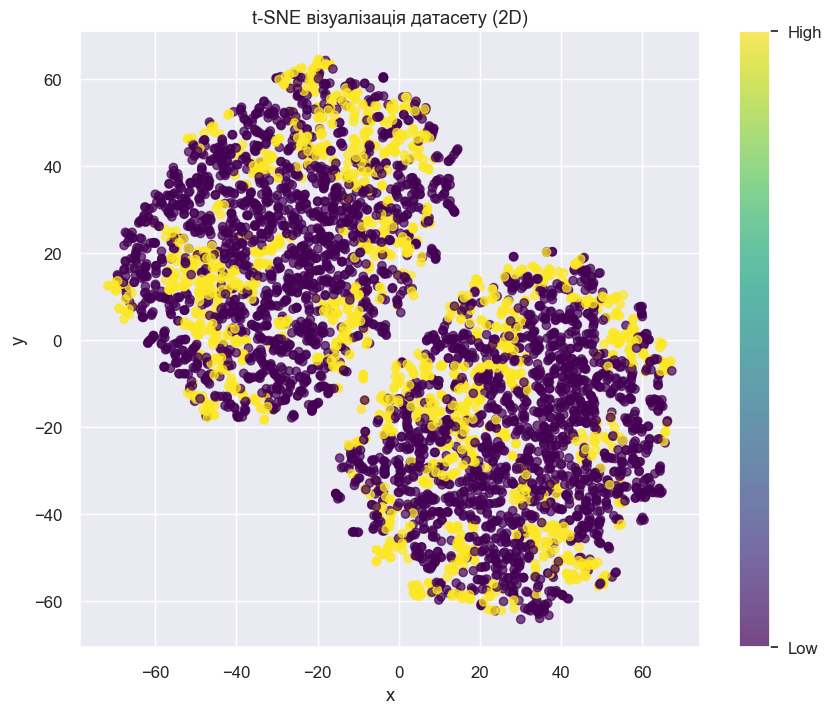

In [22]:
#t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, ticks=[0, 1], format=plt.FuncFormatter(lambda val, loc: ['Low', 'High'][int(val)]))
plt.title('t-SNE візуалізація датасету (2D)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [23]:
'''t-SNE зменшує розмірність до 2D для візуалізації, зберігаючи локальну структуру даних.
На графіку точки з однаковими мітками (Low/High Sales) повинні групуватися разом, показуючи кластери.
Якщо кластери чітко розділені, дані добре сепарабельні; якщо перетинаються - класифікація складніша.'''

't-SNE зменшує розмірність до 2D для візуалізації, зберігаючи локальну структуру даних.\nНа графіку точки з однаковими мітками (Low/High Sales) повинні групуватися разом, показуючи кластери.\nЯкщо кластери чітко розділені, дані добре сепарабельні; якщо перетинаються - класифікація складніша.'

In [27]:
image = Image.open("C:/Users/User/Downloads/Berlin.jpg")

#переводимо в numpy масив
original_img = np.array(image, dtype=np.float64) / 255

#перетворюємо в (висота × ширина, 3) для K-Means
w, h, d = original_shape = original_img.shape
image_array = np.reshape(original_img, (w * h, d))

(np.float64(-0.5), np.float64(959.5), np.float64(1279.5), np.float64(-0.5))

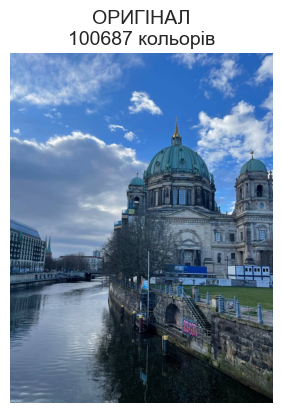

In [28]:
#зображення
fig = plt.figure(figsize=(20, 10))

ax = plt.subplot(2, 5, 1)
plt.imshow(original_img)
plt.title(f"ОРИГІНАЛ\n{len(np.unique(image_array, axis=0))} кольорів", fontsize=14)
plt.axis('off')

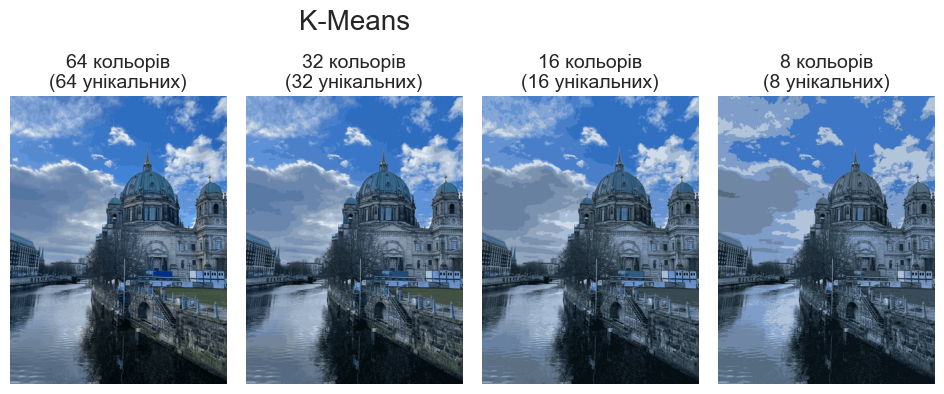

In [30]:
#кількість кольорів
n_colors_list = [64, 32, 16, 8]
positions = [2, 3, 4, 5, 7, 8, 9, 10]

for i, n_colors in enumerate(n_colors_list):
    image_array_sample = shuffle(image_array, random_state=42)[:10000]
    
    #навчання
    kmeans = KMeans(n_clusters=n_colors, random_state=42, n_init=10)
    kmeans.fit(image_array_sample)
    
    #предікт
    labels = kmeans.predict(image_array)
    quantized_img = kmeans.cluster_centers_[labels]
    quantized_img = np.reshape(quantized_img, (w, h, d))
    
    #візуалізація
    ax = plt.subplot(2, 5, positions[i])
    plt.imshow(quantized_img)
    unique_colors = len(np.unique(quantized_img.reshape(-1, 3), axis=0))
    plt.title(f"{n_colors} кольорів\n({unique_colors} унікальних)", fontsize=14)
    plt.axis('off')

plt.suptitle("K-Means", fontsize=20, y=0.98)
plt.tight_layout()
plt.show()

In [34]:
#spambase
data = pd.read_csv('C:/Users/User/Downloads/spambase/spambase.data', header=None)
data.columns = [f'f{i}' for i in range(57)] + ['is_spam']

In [35]:
#ключові слова
word_names = [
    'make', 'address', 'all', '3d', 'our', 'over', 'remove', 'internet', 'order', 'mail',
    'receive', 'will', 'people', 'report', 'addresses', 'free', 'business', 'email', 'you',
    'credit', 'your', 'font', '000', 'money', 'hp', 'hpl', 'george', '650', 'lab', 'labs',
    'telnet', '857', 'data', '415', '85', 'technology', '1999', 'parts', 'pm', 'direct',
    'cs', 'meeting', 'original', 'project', 're', 'edu', 'table', 'conference'
]

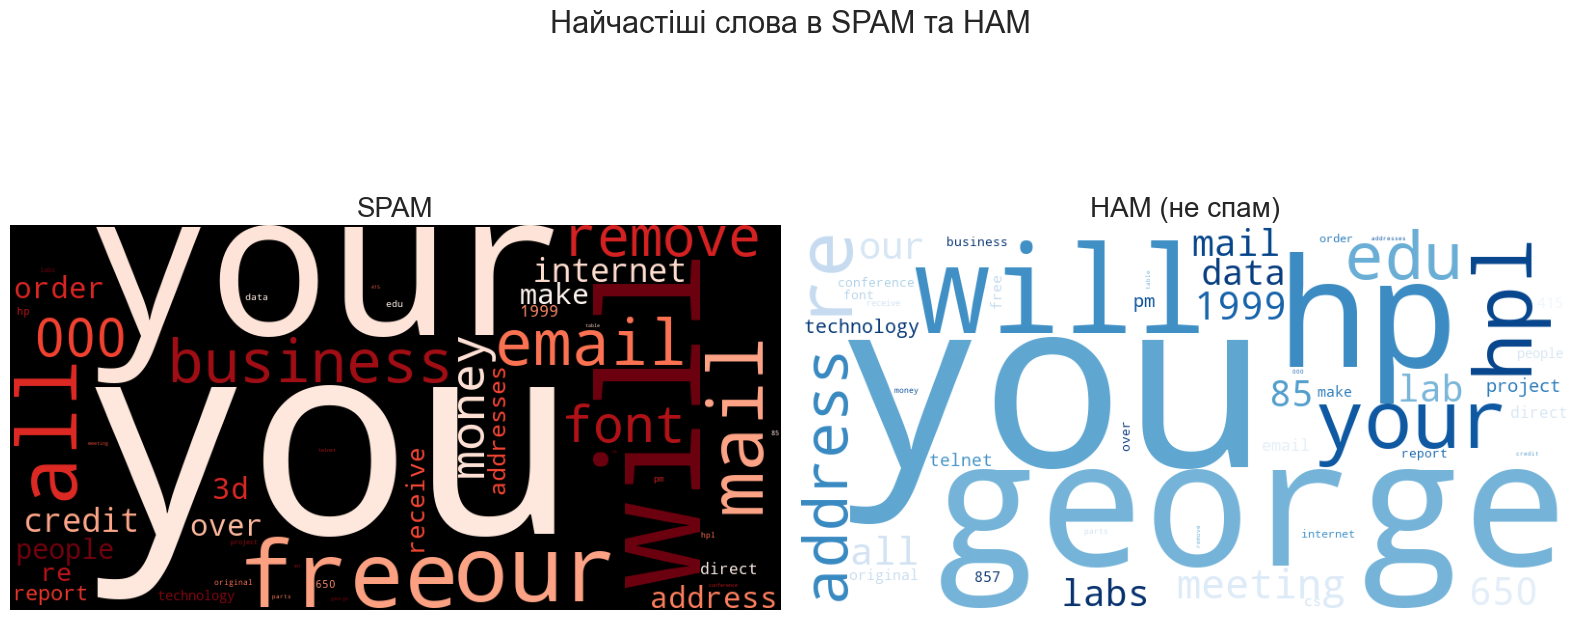

In [36]:
#wordcloud
word_freq_cols = data.columns[:48]
spam_words = data[data['is_spam']==1][word_freq_cols].mean()
ham_words  = data[data['is_spam']==0][word_freq_cols].mean()

spam_dict = dict(zip(word_names, spam_words))
ham_dict  = dict(zip(word_names, ham_words))

plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate_from_frequencies(spam_dict)
plt.imshow(WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate_from_frequencies(spam_dict))
plt.title('SPAM', fontsize=20)
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate_from_frequencies(ham_dict))
plt.title('HAM (не спам)', fontsize=20)
plt.axis('off')
plt.suptitle('Найчастіші слова в SPAM та HAM', fontsize=22)
plt.tight_layout()
plt.show()

In [37]:
#classification
X = data.drop('is_spam', axis=1)
y = data['is_spam']

#tf-idf
X_tfidf = TfidfTransformer().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42, stratify=y)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"\nТочність: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred, target_names=['Ham', 'Spam']))


Точність: 0.7676
              precision    recall  f1-score   support

         Ham       0.78      0.87      0.82       558
        Spam       0.75      0.61      0.68       363

    accuracy                           0.77       921
   macro avg       0.76      0.74      0.75       921
weighted avg       0.77      0.77      0.76       921



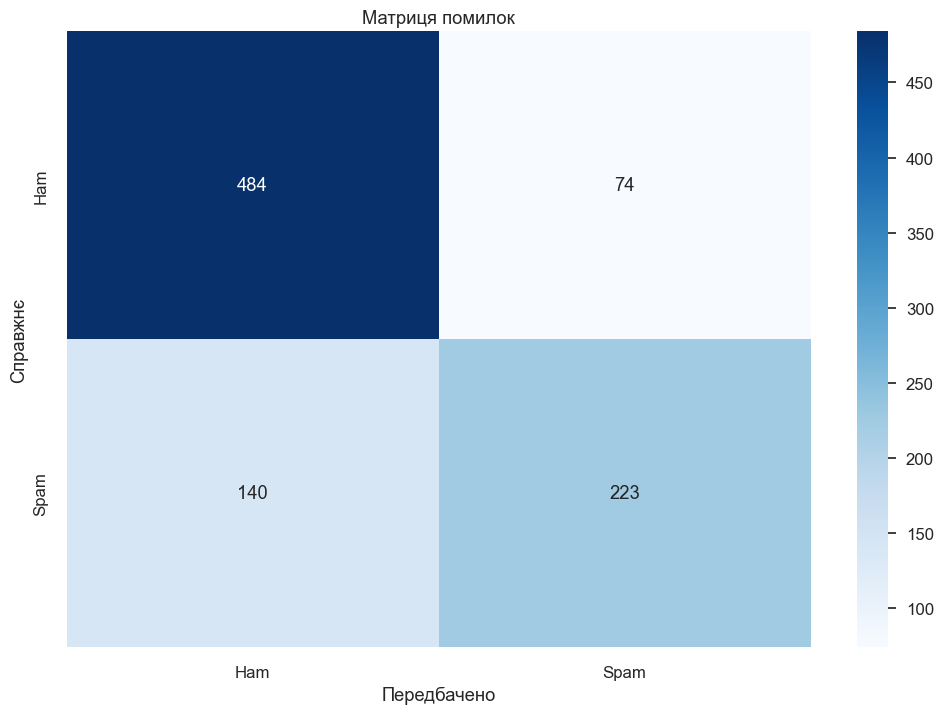

In [38]:
#confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Передбачено')
plt.ylabel('Справжнє')
plt.title('Матриця помилок')
plt.show()